

# Assignment 2: Lunar Lander 
**Task 2**

Student Name- Sandeep Dubey & Kshitija Shelar

Student Number- 20200220

Student Number- 20200155




Use  the DeepQLearning reinforcement  learning algorithm to train  an agent to play the Lunar Lander game and perform a suitable evaluation to determine how effective the model trained 

In [ ]:
!pip install keras-rl2
!pip install h5py
!pip install Pillow
!pip install gym[atari]
!pip install Box2D


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from PIL import Image

import gym

import LunarEirLander
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Permute, Convolution2D
from tensorflow.keras.optimizers import Adam

# We use keras-rl2 a reinforcement learning package that builds on top of keras and openAI gym (pip install keras-rl2) 
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

**Target image dimension, input image will have width and heoght of 84, we are considering stecklength of 4 passing 4 sequential frames**

In [ ]:
rl_model_time_comparisons = dict()
rl_model_reward_comparisons = dict()
ROWS = 84
COLS = 84
STACK_LENGTH = 4
input_shape = (STACK_LENGTH, ROWS, COLS)
env = LunarEirLander.LunarEirLander()
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n
ENV_NAME="LunarEirLander"

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## MOdel1

1) We built a sequential model with three hidden layers, each containing 16 neurons.
The input will be a 1 x state space vector, and each potential action will have an output neuron that predicts the Q value of that action for each move.
We can select the action with the highest Q value by taking the argmax of the outputs. 

2) We've built a SequentialMemory object with the rl.memory class.
SequentialMemory is a form of memory that is organized in a sequential order.
This creates a data structure for storing the agent's experience that is both quick and effective.
We've set the maximum size of this memory object to 50000 in that.
As new memories are added to this memory, it fills up, and old ones fade away.

3).We used EpsGreedyQPolicy to strike a balance between discovery and exploitation.
In this policy, we can change the value of.
If a random number less than this value is chosen, an event is chosen entirely at random.
Otherwise, the best course of action is selected. This phase allows for some haphazard discovery of the worth of different actions in various states, and it can be scaled back over time to allow the algorithm to focus more on leveraging the best strategies it has discovered.
We used the default value of eps, which is 0.1, in this model. 

4) After our model,memory and policy are defined, we create a deep Q network Agent and send that agent with those objects.

 5) Finally the model is compiled using a mean-squared error loss function with the Adam optimizer. The learning rate of Adam optimizer is set to 0.0001.

In [ ]:
import time
# Next, we build a very simple model.
model2 = Sequential()
model2.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model2.add(Dense(16))
model2.add(Activation('relu'))
model2.add(Dense(16))
model2.add(Activation('relu'))
model2.add(Dense(16))
model2.add(Activation('relu'))
model2.add(Dense(nb_actions))
model2.add(Activation('linear'))
print(model2.summary())




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                144       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

**Using DQNagent following EPSgreedypolicy with eps of 0.2, trained using mean absolute error as loss with an learning rate of 0.0001**

In [ ]:


# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = EpsGreedyQPolicy(eps=.2)
dqn1 = DQNAgent(model=model2, nb_actions=nb_actions, memory=memory, nb_steps_warmup=15,
               target_model_update=1e-2, policy=policy)
dqn1.compile(Adam(lr=0.0001), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.

start = time.time()
dqn1.fit(env, nb_steps=100000, visualize=False, verbose=2)

end = time.time()
timetaken=end - start
rl_model_time_comparisons['Model 1'] = timetaken

# After training is done, we save the final weights.


Training for 100000 steps ...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


   119/100000: episode: 1, duration: 1.475s, episode steps: 119, steps per second:  81, episode reward: -593.003, mean reward: -4.983 [-100.000,  3.505], mean action: 1.647 [0.000, 3.000],  loss: 6.800469, mae: 0.819397, mean_q: 0.003725
   186/100000: episode: 2, duration: 0.481s, episode steps:  67, steps per second: 139, episode reward: -539.714, mean reward: -8.055 [-100.000,  0.298], mean action: 1.448 [0.000, 3.000],  loss: 35.206562, mae: 1.465692, mean_q: -0.138315
   271/100000: episode: 3, duration: 0.638s, episode steps:  85, steps per second: 133, episode reward: -506.872, mean reward: -5.963 [-100.000,  2.953], mean action: 1.459 [0.000, 3.000],  loss: 62.807755, mae: 1.699433, mean_q: -0.247128
   425/100000: episode: 4, duration: 1.204s, episode steps: 154, steps per second: 128, episode reward: -582.657, mean reward: -3.783 [-100.000,  4.279], mean action: 1.890 [0.000, 3.000],  loss: 55.175560, mae: 1.750700, mean_q: -0.348026
   566/100000: episode: 5, duration: 1.136

**We are training model 1 with eps value of 0.2 and learning rate of 0.0001 having greedypolicy. We are testing it for 50 episodes, model1 gives a mean reward of -155 with standard deviation of 54.89. Which shows that the rewards do not vary a lot from mean, also the min and max value of reward ranges from -265 to 2 hence showing some outer range values. Also the time taken is 436.**

In [ ]:
history = dqn1.test(env, nb_episodes=50, visualize=False)
rewards = np.array(history.history['episode_reward'])
print(("Test rewards (#episodes={}): mean={:>5.2f}, std={:>5.2f}, "
           "min={:>5.2f}, max={:>5.2f}")
                  .format(len(rewards),
                  rewards.mean(),
                  rewards.std(),
                  rewards.min(),
                  rewards.max()))

rl_model_reward_comparisons["Model 1"] = rewards.mean()

Testing for 50 episodes ...
Episode 1: reward: -161.751, steps: 88
Episode 2: reward: -97.933, steps: 33
Episode 3: reward: 2.658, steps: 77
Episode 4: reward: -111.825, steps: 50
Episode 5: reward: -222.824, steps: 159
Episode 6: reward: -137.047, steps: 88
Episode 7: reward: -202.486, steps: 192
Episode 8: reward: -128.752, steps: 74
Episode 9: reward: -207.555, steps: 218
Episode 10: reward: -142.774, steps: 43
Episode 11: reward: -46.509, steps: 77
Episode 12: reward: -159.620, steps: 177
Episode 13: reward: -150.719, steps: 101
Episode 14: reward: -183.486, steps: 137
Episode 15: reward: -112.938, steps: 89
Episode 16: reward: -118.876, steps: 32
Episode 17: reward: -250.564, steps: 198
Episode 18: reward: -204.228, steps: 178
Episode 19: reward: -208.354, steps: 81
Episode 20: reward: -175.453, steps: 85
Episode 21: reward: -130.508, steps: 143
Episode 22: reward: -100.000, steps: 1
Episode 23: reward: -104.701, steps: 25
Episode 24: reward: -157.650, steps: 190
Episode 25: rewar

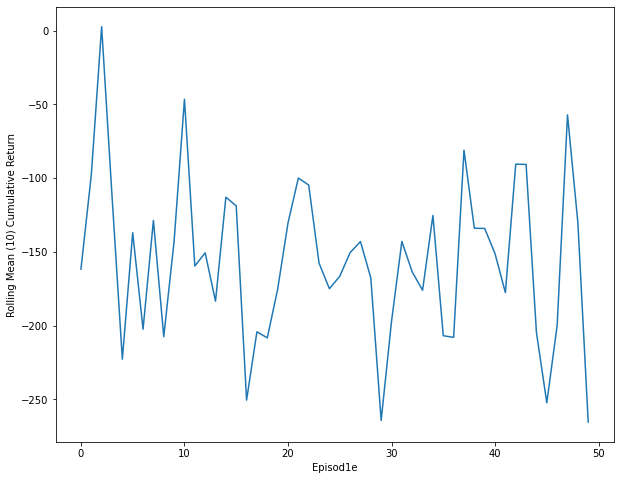

In [ ]:
fig = plt.figure(figsize=(10, 8))
dataframe = pd.DataFrame(history.history)
ax = dataframe['episode_reward'].plot()
dataframe['episode_reward'].rolling(100).mean().plot(color = 'black')
ax.set_xlabel("Episod1e")
plt.ylabel("Rolling Mean (10) Cumulative Return")
plt.show()

# Model 2

**Using DQNagent following EPSgreedypolicy with eps of 0.1, trained using mean absolute error as loss with an learning rate of 0.001**

In [ ]:
import time

model3 = Sequential()
model3.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model3.add(Dense(16))
model3.add(Activation('relu'))
model3.add(Dense(16))
model3.add(Activation('relu'))
model3.add(Dense(16))
model3.add(Activation('relu'))
model3.add(Dense(nb_actions))
model3.add(Activation('linear'))
print(model3.summary())


# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = EpsGreedyQPolicy(eps=.1)
dqn2 = DQNAgent(model=model3, nb_actions=nb_actions, memory=memory, nb_steps_warmup=15,
               target_model_update=1e-2, policy=policy,train_interval=2)
dqn2.compile(Adam(lr=0.001), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.

start = time.time()
dqn2.fit(env, nb_steps=100000, visualize=False, verbose=2)

end = time.time()
timetaken=end - start
rl_model_time_comparisons['Model 2'] = timetaken

# After training is done, we save the final weights.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_6 (Activation)    (None, 16)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
/usr/local/lib/python3.7/dist-packages/rl/memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    89/100000: episode: 1, duration: 1.074s, episode steps:  89, steps per second:  83, episode reward: -397.066, mean reward: -4.461 [-100.000,  2.750], mean action: 1.989 [0.000, 3.000],  loss: 5.262025, mae: 0.819840, mean_q: 0.055753
   185/100000: episode: 2, duration: 0.442s, episode steps:  96, steps per second: 217, episode reward: -406.266, mean reward: -4.232 [-100.000, 132.460], mean action: 0.875 [0.000, 3.000],  loss: 31.376845, mae: 1.424103, mean_q: -0.577969
   262/100000: episode: 3, duration: 0.367s, episode steps:  77, steps per second: 210, episode reward: -479.976, mean reward: -6.233 [-100.000, 78.792], mean action: 1.273 [0.000, 3.000],  loss: 87.959018, mae: 2.758246, mean_q: -2.058684
   263/100000: episode: 4, duration: 0.012s, episode steps:   1, steps per second:  87, episode reward: -100.000, mean reward: -100.000 [-100.000, -100.000], mean action: 3.000 [3.000, 3.000],  loss: 288.657715, mae: 4.794369, mean_q: -3.241854
   345/100000: episode: 5, duration:

In [ ]:
dqn2.save_weights('dqn2_{}_weights_model_2.h5f'.format(ENV_NAME), overwrite=True)

**We are training model 2 with eps value of 0.1 and learning rate of 0.001 having greedypolicy. We are testing it for 50 episodes, model2 gives a mean reward of -846 with standard deviation of 336.65. Which shows that the rewards  vary a lot from mean, also the min and max value of reward ranges from -1180 to 81.78 hence showing some extreme outer range values. Also the time taken is 418 for 189 episode while training which shows model2 takes more time then model 1 to run.**

In [ ]:

history = dqn2.test(env, nb_episodes=50, visualize=False)
rewards = np.array(history.history['episode_reward'])
print(("Test rewards (#episodes={}): mean={:>5.2f}, std={:>5.2f}, "
           "min={:>5.2f}, max={:>5.2f}")
                  .format(len(rewards),
                  rewards.mean(),
                  rewards.std(),
                  rewards.min(),
                  rewards.max()))

rl_model_reward_comparisons["Model_2"] = rewards.mean()

Testing for 50 episodes ...
Episode 1: reward: -1093.248, steps: 4719
Episode 2: reward: -1018.274, steps: 4455
Episode 3: reward: -874.197, steps: 4128
Episode 4: reward: -1034.412, steps: 4676
Episode 5: reward: -1017.438, steps: 4459
Episode 6: reward: -1084.097, steps: 4760
Episode 7: reward: -886.016, steps: 3985
Episode 8: reward: -923.623, steps: 4117
Episode 9: reward: -913.289, steps: 4159
Episode 10: reward: -941.791, steps: 4009
Episode 11: reward: -934.824, steps: 4300
Episode 12: reward: -997.112, steps: 4181
Episode 13: reward: -100.000, steps: 1
Episode 14: reward: -1041.661, steps: 4468
Episode 15: reward: -1049.422, steps: 4605
Episode 16: reward: -1009.738, steps: 4444
Episode 17: reward: -1092.985, steps: 5076
Episode 18: reward: -1085.670, steps: 4764
Episode 19: reward: -976.680, steps: 3934
Episode 20: reward: -100.000, steps: 1
Episode 21: reward: -861.963, steps: 3643
Episode 22: reward: -1006.035, steps: 4612
Episode 23: reward: -103.572, steps: 30
Episode 24: 

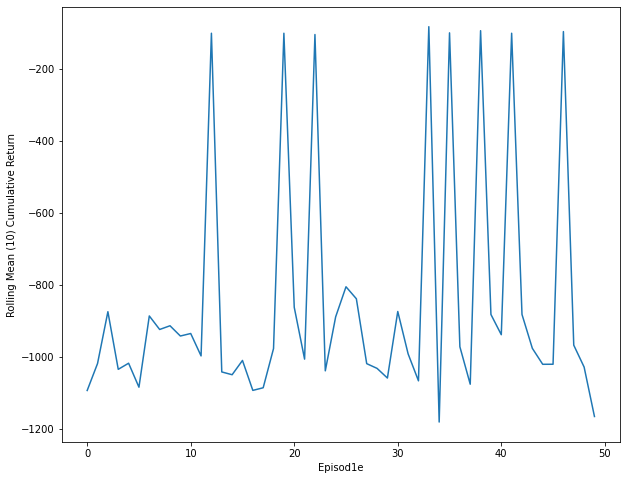

In [ ]:
fig = plt.figure(figsize=(10, 8))
dataframe = pd.DataFrame(history.history)
ax = dataframe['episode_reward'].plot()
dataframe['episode_reward'].rolling(100).mean().plot(color = 'black')
ax.set_xlabel("Episod1e")
plt.ylabel("Rolling Mean (10) Cumulative Return")
plt.show()

# Task3

***In task 3 We are testing model 1 with eps =0.2 and learning rate of 0.0001 for 200 episodes, model1 gives a mean reward of -213.46 with standard deviation of 83.45. Which shows that the rewards do not vary a lot from mean, also the min and max value of reward ranges from -433 to 15.75 hence showing some outer range values. Although testing on 200 episodes rewards have become less and standard deviation has increased but still it perform well as compared to model 2***

In [ ]:
history = dqn1.test(env, nb_episodes=200, visualize=False)
rewards = np.array(history.history['episode_reward'])
print(("Test rewards (#episodes={}): mean={:>5.2f}, std={:>5.2f}, "
           "min={:>5.2f}, max={:>5.2f}")
                  .format(len(rewards),
                  rewards.mean(),
                  rewards.std(),
                  rewards.min(),
                  rewards.max()))

rl_model_reward_comparisons["Model 2"] = rewards.mean()

Testing for 200 episodes ...
Episode 1: reward: -196.851, steps: 129
Episode 2: reward: -284.717, steps: 122
Episode 3: reward: -157.485, steps: 61
Episode 4: reward: -137.813, steps: 45
Episode 5: reward: -255.970, steps: 136
Episode 6: reward: -367.001, steps: 110
Episode 7: reward: -345.792, steps: 122
Episode 8: reward: 15.748, steps: 96
Episode 9: reward: -246.028, steps: 95
Episode 10: reward: -274.766, steps: 62
Episode 11: reward: -198.944, steps: 49
Episode 12: reward: -123.562, steps: 65
Episode 13: reward: -115.727, steps: 10
Episode 14: reward: -263.564, steps: 130
Episode 15: reward: -276.913, steps: 128
Episode 16: reward: -341.128, steps: 156
Episode 17: reward: -273.258, steps: 93
Episode 18: reward: -218.337, steps: 138
Episode 19: reward: -269.513, steps: 123
Episode 20: reward: -218.157, steps: 123
Episode 21: reward: -224.734, steps: 68
Episode 22: reward: -55.056, steps: 137
Episode 23: reward: -170.357, steps: 49
Episode 24: reward: -187.703, steps: 73
Episode 25:

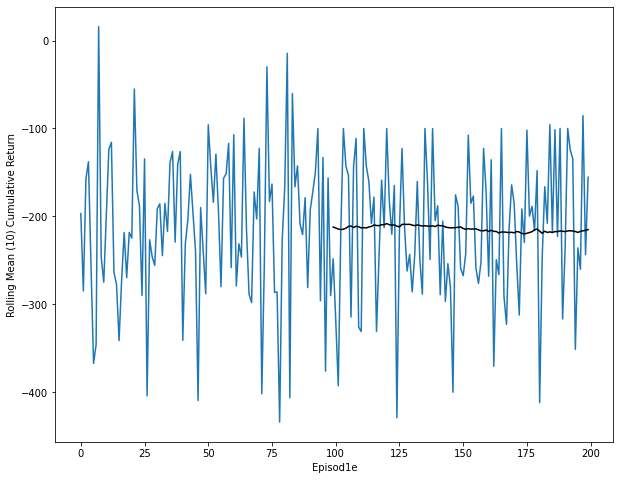

In [ ]:
fig = plt.figure(figsize=(10, 8))
dataframe = pd.DataFrame(history.history)
ax = dataframe['episode_reward'].plot()
dataframe['episode_reward'].rolling(100).mean().plot(color = 'black')
ax.set_xlabel("Episod1e")
plt.ylabel("Rolling Mean (10) Cumulative Return")
plt.show()

***In task 3 We are testing model 2 with eps =0.1 and learning rate of 0.001 for 200 episodes, model2 gives a mean=-868.55, std=336.97, min=-1314.64, max=13.80. Which shows that the rewards do vary a lot from mean,although for 50 episodes and 200 episodes the mean is same but the min and max value of reward ranges from -1314 to 13.80 hence showing some outer range values. Although testing on 200 episodes rewards are similar to 50 episodes and standard deviation has increased ***

In [ ]:
history = dqn2.test(env, nb_episodes=200, visualize=False)
rewards = np.array(history.history['episode_reward'])
print(("Test rewards (#episodes={}): mean={:>5.2f}, std={:>5.2f}, "
           "min={:>5.2f}, max={:>5.2f}")
                  .format(len(rewards),
                  rewards.mean(),
                  rewards.std(),
                  rewards.min(),
                  rewards.max()))

rl_model_reward_comparisons["Model 2"] = rewards.mean()

Testing for 200 episodes ...
Episode 1: reward: -1047.139, steps: 4426
Episode 2: reward: -927.654, steps: 3717
Episode 3: reward: -1307.196, steps: 6433
Episode 4: reward: -68.403, steps: 52
Episode 5: reward: -994.715, steps: 4436
Episode 6: reward: -100.000, steps: 1
Episode 7: reward: -838.912, steps: 4039
Episode 8: reward: -1156.032, steps: 4792
Episode 9: reward: -1072.775, steps: 4520
Episode 10: reward: -957.638, steps: 4116
Episode 11: reward: -988.230, steps: 4292
Episode 12: reward: -1117.249, steps: 5027
Episode 13: reward: -988.546, steps: 4523
Episode 14: reward: -962.831, steps: 4484
Episode 15: reward: -978.298, steps: 4474
Episode 16: reward: -1002.877, steps: 4215
Episode 17: reward: -917.026, steps: 4152
Episode 18: reward: -997.483, steps: 4491
Episode 19: reward: -888.968, steps: 3885
Episode 20: reward: -976.119, steps: 4269
Episode 21: reward: -1175.043, steps: 5105
Episode 22: reward: -901.884, steps: 4171
Episode 23: reward: -811.514, steps: 3662
Episode 24: r

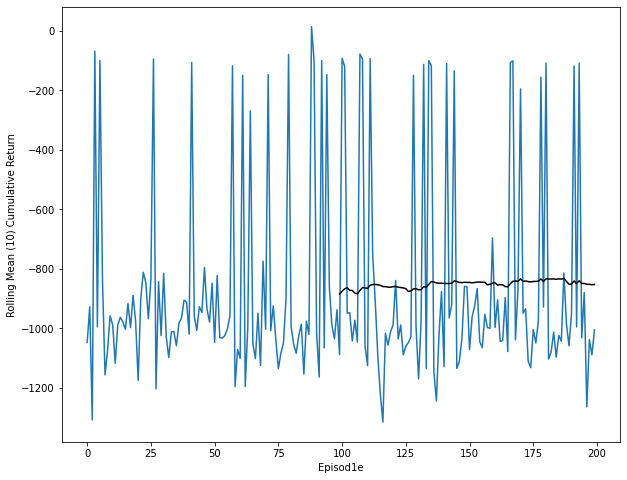

In [ ]:
fig = plt.figure(figsize=(10, 8))
dataframe = pd.DataFrame(history.history)
ax = dataframe['episode_reward'].plot()
dataframe['episode_reward'].rolling(100).mean().plot(color = 'black')
ax.set_xlabel("Episod1e")
plt.ylabel("Rolling Mean (10) Cumulative Return")
plt.show()